This notebook contains an analysis of the datasets 'ds1_a.txt' and 'ds1_b.txt'. Our goal is to understand why the fitting procecure using
gradient descent in 'p01_lr.py' converges quickly on dataset a but does not seem to converge for dataset b.

In [119]:
import util
import matplotlib.pyplot as plt
import numpy as np

Xa , Ya = util.load_csv('../data/ds1_a.csv')
Xb , Yb = util.load_csv('../data/ds1_b.csv')

print(f'Dataset a has inputs of size {Xa.shape[-1]}')
print(f'Dataset b has inputs of size {Xb.shape[-1]}')

Dataset a has inputs of size 2
Dataset b has inputs of size 2


First let's plot both datasets.

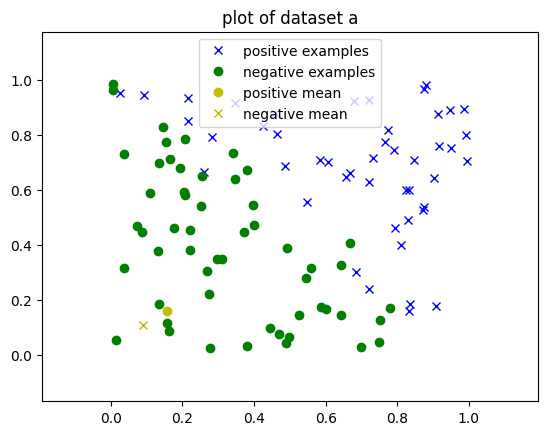

46.0 percent of dataset a examples are positive.
The initial gradient of the loss function is [0.06933894 0.05253833] for dataset a


In [2]:
## This code block creates the plot of the two datasets.

# Find the spread of the x_0 coordinate in both datasets.
x0a_spread = Xa[:,0].max() - Xa[:,0].min()
x1a_spread = Xa[:,1].max() - Xa[:,1].min()

x0b_spread = Xb[:,0].max() - Xb[:,0].min()
x1b_spread = Xb[:,1].max() - Xb[:,1].min()

# Calculate 20% of the spread as margin on either side 

# Calculate 20% of the spread as margin on either side 
x0a_margin = x0a_spread / 5
x1a_margin = x1a_spread / 5 


x0b_margin = x0b_spread / 5
x1b_margin = x1b_spread / 5 


fig , axa = plt.subplots()

# Set the x and y ranges
axa.set_xlim(Xa[:,0].min() - x0a_margin , Xa[:,0].max() + x0a_margin)
axa.set_ylim(Xa[:,1].min() - x1a_margin , Xa[:,1].max() + x1a_margin)

axa.set_title('plot of dataset a')

axa.plot(Xa[Ya == 1, 0], Xa[Ya == 1, 1], 'bx', linewidth=2, label='positive examples')
axa.plot(Xa[Ya == -1, 0], Xa[Ya == -1,1], 'go', linewidth=2, label='negative examples')

# Let's also plot the mean of the positive and negative examples.
m , n = Xa.shape
xa_pos_mean = 1/(2*m) * np.sum(Xa[Ya==1,:], axis=0)
xa_neg_mean = 1/(2*m) * np.sum(Xa[Ya==-1,:], axis=0)

axa.plot(xa_pos_mean[0], xa_pos_mean[1], 'yo', linewidth=10, label = 'positive mean')
axa.plot(xa_neg_mean[0], xa_neg_mean[1], 'yx', linewidth=10, label = 'negative mean')

axa.legend()


plt.savefig('ds1_a.png', format='png')
plt.show()


print(f'{100 * Xa[Ya==1,:].shape[0]/Xa.shape[0] } percent of dataset a examples are positive.')
print(f'The initial gradient of the loss function is {xa_pos_mean - xa_neg_mean} for dataset a')


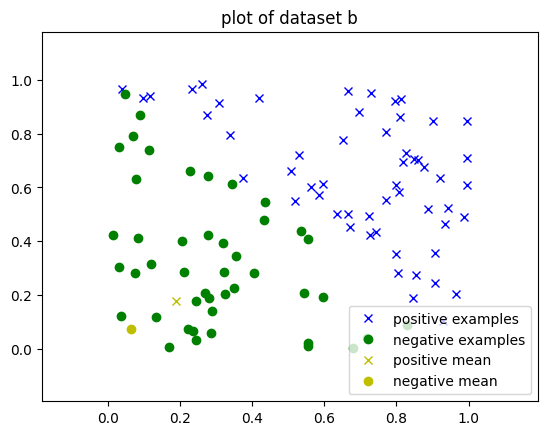

55.0 percent of dataset b examples are positive.
The initial gradient for the loss function on dataset b is [0.03247627 0.01851479].


In [3]:
## Yes, this is true. Let's now plot dataset b:

# Find the spread of the x_0 coordinate in the two datasets:
x0b_spread = Xb[:,0].max() - Xb[:,0].min()
x1b_spread = Xb[:,1].max() - Xb[:,1].min()

fig , ax = plt.subplots()

# Set the x and y ranges
ax.set_xlim(Xb[:,0].min() - x0b_margin , Xb[:,0].max() + x0b_margin)
ax.set_ylim(Xb[:,1].min() - x1b_margin , Xb[:,1].max() + x1b_margin)

ax.set_title('plot of dataset b')

ax.plot(Xb[Yb == 1, 0], Xb[Yb == 1, 1], 'bx', linewidth=2, label='positive examples')
ax.plot(Xb[Yb == -1, 0], Xb[Yb == -1,1], 'go', linewidth=2, label='negative examples')

# Calculate the initial gradient
mb , nb = Xb.shape
xb_pos_mean = 1/(2*mb) * np.sum(Xb[Yb==1,:], axis=0)
xb_neg_mean = 1/(2*mb) * np.sum(Xb[Yb==-1,:], axis=0)
init_grad_b = xb_pos_mean - xa_pos_mean

ax.plot(xb_pos_mean[0], xb_pos_mean[1], 'yx' , linewidth=10, label='positive mean')
ax.plot(xb_neg_mean[0], xb_neg_mean[1], 'yo', linewidth=10, label='negative mean')

ax.legend()


plt.savefig('ds1_b.png', format='png')
plt.show()

print(f'{100 * Xb[Yb==1,:].shape[0]/Xb.shape[0]} percent of dataset b examples are positive.')
print(f'The initial gradient for the loss function on dataset b is {init_grad_b}.')




Let's try to get a better picture of what's going on with our loss function. First, we'll define the log loss as a function of theta, the inputs X, and labels Y, assuming the labels are 0 or 1. 

In [4]:
def loss(X,Y,theta):
    """Log loss function for logistic regression.

    Args:
        X: Array of inputs of shape (m,n)
        Y: Array of labels of shape (m,) with entries 0 or 1.
        theta: Vector of parameters of shape (n,) 
    """
    m , n = X.shape
    
    def h(X,theta):
        return 1 / ( 1 + np.exp ( -X @ theta))
    
    return (1 / m) * Y.dot(np.log(h(X,theta))) + (1 - Y).dot(np.log(1 - h(X,theta)))




In [5]:
## Make sure the Y labels are in the correct format
a_labels = (Ya + 1)/2
b_labels = (Yb + 1)/2

theta = np.zeros(Xa.shape[1])

print(loss(X=Xa, Y=a_labels, theta=theta))
print(loss(X=Xa,Y=a_labels,theta=np.array([0.5,0.7])))

-37.748795453294626
-50.89657320662079


We are going to modify the code used to train the datasets by adding in a step which plots the gradient of the loss function every 1000 iterations until converge occurs (dataset a) or until a specified number of iterations has been reached (dataset b). To start with, we'll import the code written in p01_lr.py and the datasets with the intercept axis added.

In [120]:
from p01_lr import calc_grad
import math
X_train_a , Y_train_a = util.load_csv('../data/ds1_a.csv',add_intercept=True)
X_train_b , Y_train_b = util.load_csv('../data/ds1_b.csv', add_intercept=True)

In [7]:
## This code will train the algorith exactly as in the Logistic Regression function in p01_lr.py
## But will additionally store the gradient of the loss function every 10,000 iterates until either
## one million iterations is reached OR convergence occurs.

## Run this on dataset a first.

theta = np.zeros(3)
learning_rate = 10
grads_a = calc_grad(X_train_a,Y_train_a,theta).reshape(1,-1)

i = 0
while True:
    i += 1
    prev_theta = theta
    grad = calc_grad(X_train_a,Y_train_a,theta)
    theta = theta - learning_rate * grad
    if i % 1000 == 0:
        grads_a = np.concatenate([grads_a, grad.reshape(1,-1)], axis=0)
    if np.linalg.norm(theta - prev_theta) < 1e-15:
        print(f'Converged in {i} iterations.')
        break
    if i > 1e6:
        print('Iterations exceeded one million. Stopping.')
        break
        

Converged in 30386 iterations.


(31, 3)


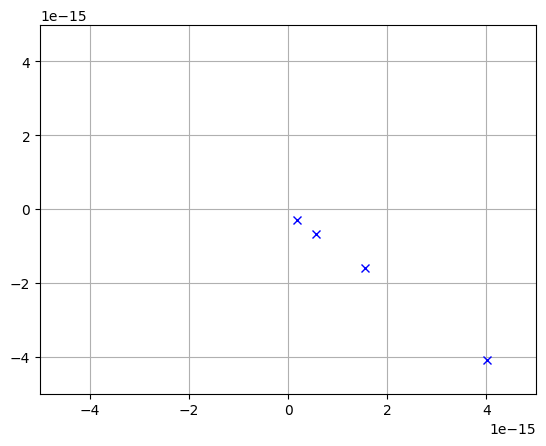

In [8]:
## Now we'll plot the gradient. Since it converged we know that we can look on the length scale of 1e-14.
## Use the x-y projection of the gradient for simplicity.

print(grads_a.shape)
fig , ax01 = plt.subplots()

ax01.set_xlim(-5e-15,5e-15)
ax01.set_ylim(-5e-15,5e-15)

ax01.plot(grads_a[:,0],grads_a[:,1], 'bx', linewidth=2)
ax01.grid()
plt.show()


In [9]:
## This code will train the algorith exactly as in the Logistic Regression function in p01_lr.py
## But will additionally store the gradient of the loss function every 10,000 iterates until either
## one million iterations is reached OR convergence occurs.

## Run this on dataset a first.

theta = np.zeros(3)
learning_rate = 10
grads_b = calc_grad(X_train_b,Y_train_b,theta).reshape(1,-1)

i = 0
while True:
    i += 1
    prev_theta = theta
    grad = calc_grad(X_train_b,Y_train_b,theta)
    theta = theta - learning_rate * grad
    if i % 10000 == 0:
        grads_b = np.concatenate([grads_b, grad.reshape(1,-1)], axis=0)
    if np.linalg.norm(theta - prev_theta) < 1e-15:
        print(f'Converged in {i} iterations.')
        break
    if i > 1e6:
        print('Iteration limited exceeded.')
        break
        

Iteration limited exceeded.


In [10]:
print(grads_b.shape)
last_norm = np.linalg.norm(grads_b[-1,:])
print(math.log10(last_norm))


(101, 3)
-4.828125957055797


(31, 3)


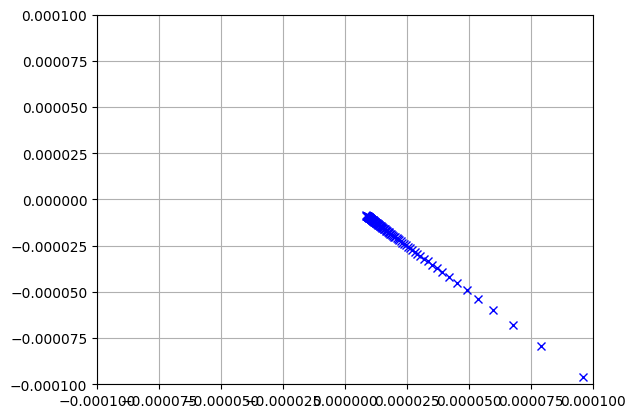

In [11]:
## Now we'll plot the gradient. Since it converged we know that we can look on the length scale of 1e-14.
## Use the x-y projection of the gradient for simplicity.

print(grads_a.shape)
fig , ax01 = plt.subplots()

ax01.set_xlim(-1e-4,1e-4)
ax01.set_ylim(-1e-4,1e-4)

ax01.plot(grads_b[:,0],grads_b[:,1], 'bx', linewidth=2)
ax01.grid()
plt.show()


Now let's understand how gradient descent works by running it for the convex functions 

$$J_a(\theta) = \frac{a}{2}||\theta||^{2}.$$

Here a > 0 and we calculate that

$$\nabla J_a (\theta) = a\theta$$

We'll consider a few values of a and run the gradient descent algorithm in $\mathbb{R}^{2}$, plotting $\nabla J_a$ across the iterations.

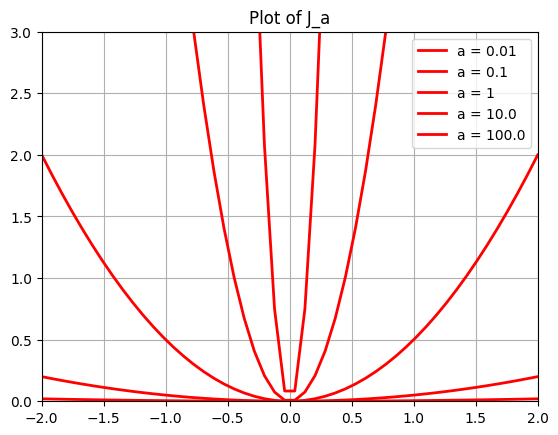

In [42]:
## Make a plot of this family for various values of a.

fig , ax = plt.subplots()
ax.set_xlim(-2,2)
ax.set_ylim(0,3)
ax.set_title('Plot of J_a')

a_values = [1e-2, 1e-1, 1, 1e1, 1e2]

def get_J(a,x_vals):
    return (a/2) * np.power(x_vals,2)

x_vals = np.linspace(-2,2,num=50)
for a in a_values:
    y_vals = get_J(a,x_vals)
    ax.plot(x_vals, y_vals,'r-' , linewidth=2, label=f'a = {a}')

plt.grid()
ax.legend()
plt.show()

In [50]:
## We'll now code the gradient descent algorithm for these functions.

def gradient(a,theta):
    return a*theta

def gradient_descent(a, initial_theta = 1,learning_rate=1):
    theta = initial_theta
    i = 0

    while True:
        i+=1
        prev_theta = theta
        grad = gradient(a,theta)
        theta = theta - learning_rate * grad
        if np.absolute(prev_theta - theta) < 1e-15:
            print(f'Gradient descent converged for a = {a} after {i} iterations.')
            print(f'The estimate for the minimum is x = {theta}.')
            print(f'On the last iteration the gradient was {grad}')
            print()
            break
        if i >= 1e6:
            print(f'Gradient descent did not converge after {i} iterations. The final esimate for the minimum is x = {theta}.')
            print(f'On the last iteration the gradient was {grad}')
            print()
            break

In [51]:
for a in a_values:
    gradient_descent(a, initial_theta=1,learning_rate=1e-3)

Gradient descent did not converge after 1000000 iterations. The final esimate for the minimum is x = 4.539765980761033e-05.
On the last iteration the gradient was 4.5398113788748215e-07

Gradient descent converged for a = 0.1 after 253273 iterations.
The estimate for the minimum is x = 9.998695820089953e-12.
On the last iteration the gradient was 9.99969578966892e-13

Gradient descent converged for a = 1 after 27619 iterations.
The estimate for the minimum is x = 9.982040173953011e-13.
On the last iteration the gradient was 9.99203220615917e-13

Gradient descent converged for a = 10.0 after 2980 iterations.
The estimate for the minimum is x = 9.837390260730281e-14.
On the last iteration the gradient was 9.936757839121496e-13

Gradient descent converged for a = 100.0 after 307 iterations.
The estimate for the minimum is x = 8.962938115922146e-15.
On the last iteration the gradient was 9.958820128802385e-13



In [78]:
## For more evidence, I'll make the plot of the gradient over the loops.
## This block copies the gradient descent algorithm but additionally stores the iteration (in thousands)
## As well as the negative log base 10 of theta.

def gradient(a,theta):
    return a*theta

def gradient_descent(a, initial_theta = 1,learning_rate=1):
    theta = initial_theta
    i = 0
    results = []

    while True:
        i+=1
        prev_theta = theta
        grad = gradient(a,theta)
        theta = theta - learning_rate * grad
        if i % 1000 == 0:
            exponent = -math.log10(abs(theta))
            results.append((i/1000,exponent))
        if np.absolute(prev_theta - theta) < 1e-15:
            print(f'Gradient descent converged for a = {a} after {i} iterations.')
            print(f'The estimate for the minimum is x = {theta}.')
            print(f'On the last iteration the gradient was {grad}')
            print()
            break
        if i >= 1e6:
            print(f'Gradient descent did not converge after {i} iterations. The final esimate for the minimum is x = {theta}.')
            print(f'On the last iteration the gradient was {grad}')
            print()
            break
    return (results,a)

Gradient descent did not converge after 1000000 iterations. The final esimate for the minimum is x = 4.539765980761033e-05.
On the last iteration the gradient was 4.5398113788748215e-07

Gradient descent converged for a = 0.1 after 253273 iterations.
The estimate for the minimum is x = 9.998695820089953e-12.
On the last iteration the gradient was 9.99969578966892e-13

Gradient descent converged for a = 1 after 27619 iterations.
The estimate for the minimum is x = 9.982040173953011e-13.
On the last iteration the gradient was 9.99203220615917e-13



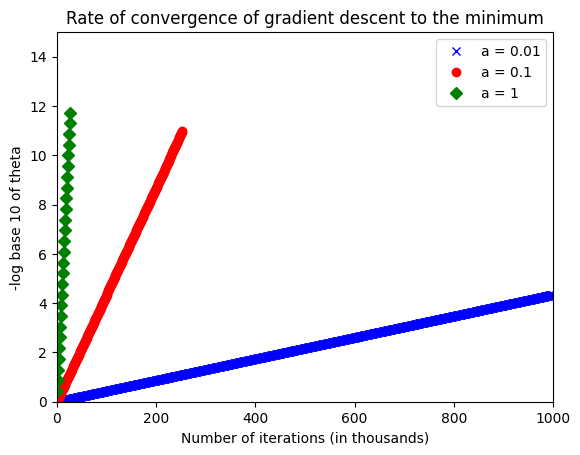

In [81]:
a_values = [1e-2,1e-1,1]
outputs = [gradient_descent(a, initial_theta=1,learning_rate=1e-3) for a in a_values]
markers = ['bx', 'ro','gD']

fig , ax = plt.subplots()
ax.set_xlim(0,1000)
ax.set_ylim(0,15)
ax.set_xlabel('Number of iterations (in thousands)')
ax.set_ylabel('-log base 10 of theta')
ax.set_title('Rate of convergence of gradient descent to the minimum')

for output , marker in zip(outputs,markers):
    results , a = output
    iterations , values = zip(*results)
    ax.plot(iterations, values, marker , linewidth=2, label=f'a = {a}')

ax.legend()
plt.show()


In [117]:
## The final step to investigate--We'll compute the eigenvalues of the hessian of the loss function at approx the minimum for both datasets.

def hessian_eigenvalues(X,Y,theta):
    """Computes the eigenvalues of the hessian of the loss function at a specified value of theta for a training set X.

    Args:
        X: Array of training inputs. Shape (m,n)
        Y: Array of training labels. Shape (n,). Entries either -1 or 1.
        theta: Vector of parameters. Shape (n,)
    """
    m , n = X.shape
    margins = Y * (X @ theta)
    beta = np.exp(margins) / (1 + np.exp(margins))**2
    outers = X.reshape(m,n,1) * X.reshape(m,1,n)
    hessian = 1/m * np.einsum('i,ijk->jk', beta, outers)
    return np.linalg.eigvalsh(hessian)




In [126]:
## Now let's run gradient descent on dataset a to find the minimum theta

## This code will train the algorith exactly as in the Logistic Regression function in p01_lr.py
## But will additionally store the gradient of the loss function every 10,000 iterates until either
## one million iterations is reached OR convergence occurs.

## Run this on dataset a first.

def get_theta(X,Y):
    theta = np.zeros(3)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X,Y,theta)
        theta = theta - learning_rate * grad
        if np.linalg.norm(theta - prev_theta) < 1e-15:
            print(f'Converged in {i} iterations.')
            break
        if i > 1e6:
            print('Iteration limited exceeded.')
            break
    return theta



In [127]:
## Run the training to get the final value of theta for each dataset.
theta_a = get_theta(X_train_a,Y_train_a)
theta_b = get_theta(X_train_b,Y_train_b)

Converged in 30386 iterations.
Iteration limited exceeded.


In [128]:
## Check the eigenvalues of the hessian there

eigs_a = hessian_eigenvalues(X_train_a,Y_train_a,theta_a)
eigs_b = hessian_eigenvalues(X_train_b,Y_train_b,theta_b)

print(eigs_a, eigs_b)

[9.50961378e-05 7.74458941e-03 7.55054893e-02] [7.37939486e-08 8.12153208e-05 5.02677036e-03]


In [131]:
## To check to see if this is accurate, we can engineer a convex function in R3 with a minimum at 0 and a similar hessian.

def model_gradient_descent(eigenvalues,learning_rate):
    """Runs gradient descent starting from [1,...,1] on the model convex function

    Args:
        eigenvalues: An array of eigenvalues of the hessian. Shape (n,). (Must be positive)
    """

    def gradient(theta):
        return eigenvalues * theta 

    i = 0
    n , = eigenvalues.shape
    theta = np.ones(n)
    
    while True:
        i+=1
        prev_theta = theta
        grad = gradient(theta)
        theta = theta - learning_rate * grad
        if np.linalg.norm(prev_theta-theta) < 1e-15:
            print(f'Converged after {i} iterations. Final size of gradient was {np.linalg.norm(grad)}')
            break
        if i >= 1e6:
            print(f'Failure to converge after 1 million iterations. Final size of the gradient was {np.linalg.norm(grad)}')
            break
    return


In [133]:
model_gradient_descent(eigs_a,learning_rate=10)

Converged after 28991 iterations. Final size of gradient was 9.992526819016665e-17


In [134]:
model_gradient_descent(eigs_b, learning_rate=10)

Failure to converge after 1 million iterations. Final size of the gradient was 3.528075780153398e-08


In [135]:
model_gradient_descent(eigs_b, learning_rate=1)

Failure to converge after 1 million iterations. Final size of the gradient was 6.854447832502389e-08


In [136]:
model_gradient_descent(eigs_b, learning_rate = 1e-1)

Failure to converge after 1 million iterations. Final size of the gradient was 7.712227592875136e-08


In [137]:
model_gradient_descent(eigs_b, learning_rate = 1e-2)

Failure to converge after 1 million iterations. Final size of the gradient was 3.605167317438943e-05


: 